## **Tổng quan**
### **Các biến quan trọng**
- TCW, TCLW, R250, R500, R850, U850, V850, EWSS, KX, CAPE, SSHF, PEV
- Các biến còn lại có thể cân nhắc
### **Timesteps**
- <= 6h cho độ tương quan tốt, có thể thử 3-6h
### **Mưa cực đoan**
- Vẫn là các biến liên quan đến lượng nước ảnh hưởng TCW, TCLW, R250, R500, R850.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import warnings

## **Đọc dữ liệu**

In [37]:
df_2019_04 = pd.read_csv('/kaggle/input/rain-precipitation-station/filter_merged_data/merged_2019-04.csv')
df_2019_10 = pd.read_csv('/kaggle/input/rain-precipitation-station/filter_merged_data/merged_2019-10.csv')
df_2020_04 = pd.read_csv('/kaggle/input/rain-precipitation-station/filter_merged_data/merged_2020-04.csv')
df_2020_10 = pd.read_csv('/kaggle/input/rain-precipitation-station/filter_merged_data/merged_2020-10.csv')

In [38]:
# Kiểm tra qua thông tin của dữ liệu
df_2020_04.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240480 entries, 0 to 240479
Data columns (total 24 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   datetime  240480 non-null  object 
 1   row       240480 non-null  int64  
 2   col       240480 non-null  int64  
 3   AWS       239812 non-null  float64
 4   CAPE      240480 non-null  float64
 5   CIN       240480 non-null  float64
 6   EWSS      240480 non-null  float64
 7   IE        240480 non-null  float64
 8   ISOR      240480 non-null  float64
 9   KX        240480 non-null  float64
 10  PEV       240480 non-null  float64
 11  R250      240480 non-null  float64
 12  R500      240480 non-null  float64
 13  R850      240480 non-null  float64
 14  SLHF      240480 non-null  float64
 15  SLOR      240480 non-null  float64
 16  SSHF      240480 non-null  float64
 17  TCLW      240480 non-null  float64
 18  TCW       240480 non-null  float64
 19  TCWV      240480 non-null  float64
 20  U250

**Nhận xét**: Ở tất cả các tháng, ở 334 pixels có giá trị trong bài toán, chỉ có AWS có các giá trị NaN và -inf, còn lại đều đầy đủ

## **Thống kê chung**

In [39]:
# Tháng 4/2019
print('Thống kê tháng 4/2019')
df_2019_04.describe()

Thống kê tháng 4/2019


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4655: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: in

row            col           AWS           CAPE  \
count  240480.000000  240480.000000  2.404800e+05  240480.000000   
mean       29.826347     112.619760          -inf    1909.989901   
std        25.673377      17.006965           NaN    1342.531978   
min         0.000000      55.000000          -inf       0.000000   
25%         8.000000     104.000000           NaN     784.750000   
50%        21.000000     113.000000  0.000000e+00    1782.000000   
75%        50.000000     122.000000  0.000000e+00    2769.250000   
max        87.000000     167.000000  1.216000e+02    8722.750000   

                 CIN           EWSS             IE           ISOR  \
count  240480.000000  240480.000000  240480.000000  240480.000000   
mean     1835.564575      48.677935      -0.000045       0.463731   
std      3501.924592     682.952355       0.000058       0.180551   
min         0.031378   -3470.890625      -0.000309       0.000000   
25%       164.246151    -281.664062      -0.000080       0.370204   
50%       342.234406     -61.531250      -0.000011       0.486200   
75%       710.547119     161.242188      -0.000002       0.596432   
max      9999.000000    7265.097656       0.000012       0.867496   

                  KX            PEV  ...          SLHF           SLOR  \
count  240480.000000  240480.000000  ...  2.404800e+05  240480.000000   
mean       31.926430      -0.000191  ... -4.091199e+05       0.020417   
std         4.999032       0.000277  ...  5.266257e+05       0.014139   
min         6.639511      -0.001346  ... -2.241972e+06       0.000100   
25%        29.173851      -0.000321  ... -7.091910e+05       0.008039   
50%        32.504944      -0.000022  ... -1.114640e+05       0.018741   
75%        35.370956      -0.000003  ... -2.301400e+04       0.031878   
max        45.255096       0.000027  ...  9.982100e+04       0.058033   

               SSHF           TCLW            TCW           TCWV  \
count  2.404800e+05  240480.000000  240480.000000  240480.000000   
mean  -8.932402e+04       0.119312      44.462577      44.303705   
std    1.957644e+05       0.158480       7.234175       7.183178   
min   -1.622733e+06       0.000000      19.561630      19.561478   
25%   -1.443830e+05       0.014130      39.800858      39.681778   
50%   -5.072000e+03       0.058533      44.808578      44.653770   
75%    1.786500e+04       0.149391      49.778717      49.587112   
max    3.520740e+05       1.124023      67.919571      67.003555   

                U250           U850           V250           V850  
count  240480.000000  240480.000000  240480.000000  240480.000000  
mean       21.077919       4.205506       6.274202       3.726311  
std         8.048650       3.602341       8.913201       2.478083  
min        -0.940399      -9.128326     -24.090134      -5.532501  
25%        15.954041       1.935638       0.821579       2.012482  
50%        21.850388       4.206512       5.194397       3.596542  
75%        26.716415       6.325695      12.324280       5.387955  
max        46.898514      16.723068      31.436935      13.222427  

[8 rows x 23 columns]

## **Định nghĩa các nhóm biến khí tượng của ERA5**
### **Độ ẩm, nước trong khí quyển**
- **R250, R500, R850:**: Độ ẩm tương đối ở các tầng khí quyển (cao, trung, thấp). R850 (gần mặt đất) quan trọng nhất vì ẩm cao ở tầng thấp là điều kiện tiên quyết để tạo mưa.
- **TCWV:** Tổng hơi nước trong cột khí quyển: nguồn cung ẩm trực tiếp cho mưa.
- **TCW:** Tổng nước (rắn + lỏng + khí) trong cột khí quyển: phản ánh tổng lượng ẩm có thể chuyển hóa thành mưa.
- **TCLW:** Nước lỏng trong mây: liên quan trực tiếp đến quá trình ngưng tụ tạo mưa.

=> Thường là các features quan trọng nhất để hình thành mây và mưa.

### **Gió và vận chuyển ẩm**
- **U250, U850, V250, V850:** Gió hướng đông và hướng bắc ở các tầng.
- **EWSS:** Ứng suất gió đông-tây: xáo trộn khí quyển, gián tiếp tạo điều kiện đối lưu.

=> Gió tầng thấp (U850, V850) vận chuyển ẩm từ biển vào đất liền, hội tụ gió là cơ chế chính kích hoạt mưa. Gió tầng cao (U250, V250) ảnh hưởng đến cấu trúc hệ thống mây.

### **Năng lượng đối lưu & Bất ổn định**
- **CAPE:** Đo năng lượng tiềm năng cho đối lưu mạnh: CAPE cao → mưa dông, mưa đá.
- **CIN:** Năng lượng "ức chế" đối lưu: CIN thấp → dễ hình thành mây đối lưu.
- **KX:** Chỉ số K tổng hợp nhiệt độ, độ ẩm: liên quan đến hình thành bão và mưa dông lớn.

### **Trao đổi nhiệt và ẩm bề mặt**
- **SLHF:** Dòng nhiệt tiềm năng: bốc hơi nước từ đất/đại dương → cung cấp ẩm cho khí quyển.
- **SSHF:** Dòng nhiệt cảm nhận: gia tăng nhiệt độ bề mặt → thúc đẩy đối lưu.
- **IE:** Dòng ẩm tức thời: tốc độ bốc hơi/ngưng tụ trực tiếp ảnh hưởng đến độ ẩm.
- **PEV:** Khả năng bay hơi tối đa: PEV cao → bề mặt khô hạn, nhưng nếu có đủ ẩm, mưa dễ xảy ra.

=> Điều khiển quá trình cung cấp ẩm và nhiệt từ bề mặt vào khí quyển, tạo điều kiện cho đối lưu. (vai trò hỗ trợ)

### **Địa hình**
- **ISOR:** Tính dị hướng của địa hình
- **SLOR:** Độ dốc của địa hình 

=> Ít ảnh hưởng


## **Phân tích độ tương quan**

In [40]:
df_all = pd.concat([df_2019_04, df_2019_10, df_2020_04, df_2020_10], ignore_index=True)
df_correlation = df_all.drop(columns=['datetime', 'row', 'col'])

<ipython-input-41-1be7eeead554>:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, correlation_with_aws[i], round(correlation_with_aws[i], 2), ha='center', va='bottom' if correlation_with_aws[i] > 0 else 'top')


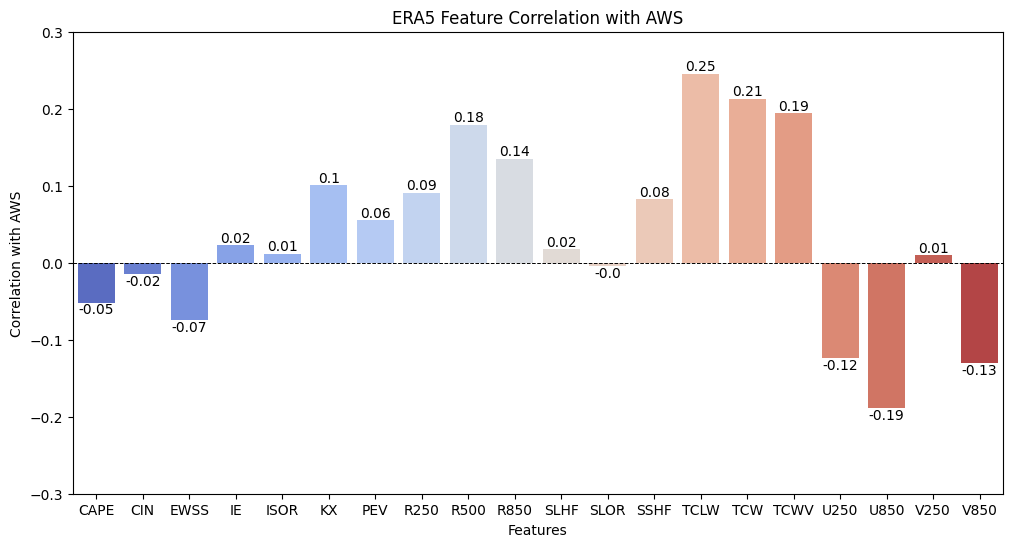

In [41]:
# Compute correlation with AWS
correlation_with_aws = df_correlation.corr()["AWS"].drop("AWS")  # Drop self-correlation

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=correlation_with_aws.index, y=correlation_with_aws.values, palette="coolwarm")
plt.ylabel("Correlation with AWS")
plt.xlabel("Features")
plt.title("ERA5 Feature Correlation with AWS")
plt.ylim(-0.3 ,0.3)  # Correlation range
plt.axhline(0, color="black", linewidth=0.7, linestyle="--")  # Add reference line at 0

# Add value on top of each bar
for i in range(len(correlation_with_aws)):
    plt.text(i, correlation_with_aws[i], round(correlation_with_aws[i], 2), ha='center', va='bottom' if correlation_with_aws[i] > 0 else 'top')

plt.show()



**Nhận xét:**
- **TCLW, TCW, TCWV (biến liên quan đnến lượng nước trong khí quyển, trong mây)** có độ tương quan lớn nhất, đóng vai trò quan trọng trong dự báo lượng mưa.
- **U250, U850, V250, V850 (biến liên quan đến tốc độ gió)** có độ tương quan tương đối, trừ V250 do biến này điều khiển hướng đi, không phải lượng mưa.
- **R250, R500, R850 (biến liên quan đến độ ẩm tương dối trong các tầng khí quyển)** có độ tương quan trung bình đồi với AWS, là các feature quan trọng.
- **ISOR, SLOR (biến liên quan đến địa hình)** không có nhiều ý nghĩa, có thể loại bỏ.
- **KX (chỉ số đo khả năng hình thành bão)** cũng là chỉ số quan trọng cần đưa vào mô hình.
- Các biến khí tượng còn lại độ quan trọng cũng không quá lớn, cần thử nghiệm để chọn ra các features tốt nhất.

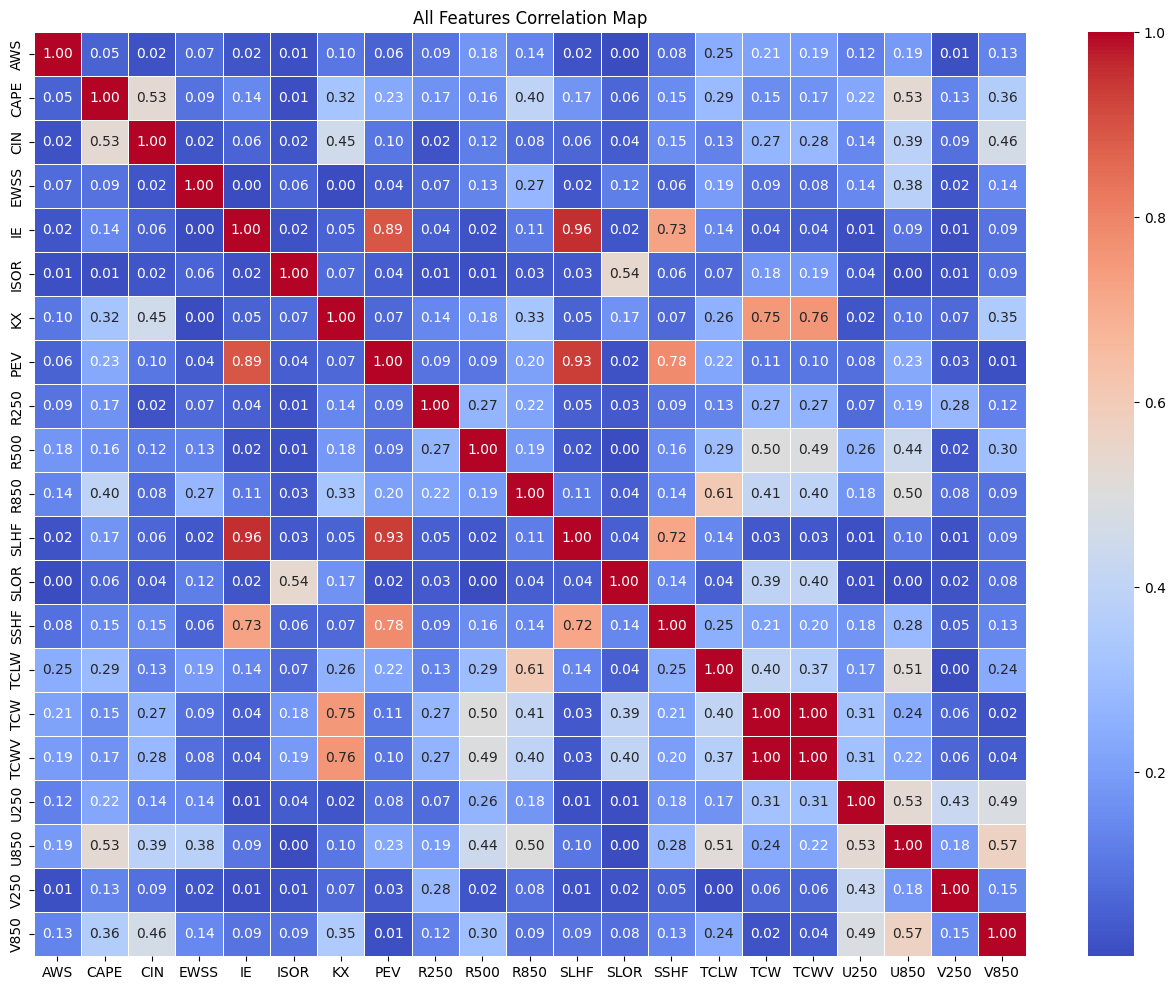

In [42]:
correlation_matrix = df_correlation.corr().abs()

# Plot the heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("All Features Correlation Map")
plt.show()



**Nhận xét:**
- 2 biến TCW và TCWV có độ tương quan = 1, có thể bỏ 1 trong 2
- PEV có độ tương quan cao với IE, còn SSHF với SLHF có độ tương quan cao (các biến liên quan đến trao đổi nhiệt và ẩm bề mặt) vậy thì có thể chỉ chọn SSHF (hoặc thêm PEV) (2 biến có độ tương quan vs AWS cao hơn)
- CIN và CAPE có độ tương quan ở mức ổn, có thể chỉ giữ lại CAPE


## **Phân tích chi tiết**

**Các hàm phụ trợ**

In [43]:
# %pip install basemap basemap-data


In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from map.basemap import Basemap
import numpy as np

def plot_boxplots_by_month(dfs, variables, subplots=2):
    """
    Vẽ box plot cho các biến theo tháng.
    :param dfs: Dictionary chứa các DataFrame với tên file làm key
    :param variables: Danh sách các biến cần vẽ box plot
    :param subplots: Số lượng plot trên mỗi hàng
    """
    num_vars = len(variables)
    rows = (num_vars + subplots - 1) // subplots
    fig, axes = plt.subplots(rows, subplots, figsize=(12 * subplots, 5 * rows))
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    df_all = pd.concat(dfs.values(), keys=dfs.keys(), names=['file', 'index']).reset_index()
    df_all['month'] = df_all['datetime'].astype(str).str[:7]
    
    for i, var in enumerate(variables):
        sns.boxplot(data=df_all, x='month', y=var, ax=axes[i])
        axes[i].set_title(f'Box Plot for {var} by Month')
        axes[i].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

def plot_time_lag_correlation(dfs, variables, lags=[1, 3, 6], subplots=2):
    """
    Vẽ biểu đồ kiểm tra độ tương quan theo thời gian.
    :param dfs: Dictionary chứa các DataFrame với tên file làm key
    :param variables: Danh sách các biến cần kiểm tra
    :param lags: Danh sách số giờ trễ cần kiểm tra độ tương quan
    :param subplots: Số lượng plot trên mỗi hàng
    """
    num_vars = len(variables)
    rows = (num_vars + subplots - 1) // subplots
    fig, axes = plt.subplots(rows, subplots, figsize=(12 * subplots, 5 * rows))
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    for i, var in enumerate(variables):
        for name, df in dfs.items():
            df_sorted = df.sort_values(by='datetime')
            correlations = []
            for lag in lags:
                df_sorted[f'{var}_lag{lag}'] = df[var].shift(lag)
                corr = df_sorted[[var, f'{var}_lag{lag}']].corr().iloc[0, 1]
                correlations.append(corr)
            
            axes[i].plot(lags, correlations, marker='o', label=name)
        
        axes[i].set_xlabel('Lag (hours)')
        axes[i].set_ylabel('Correlation')
        axes[i].set_title(f'Time Lag Correlation for {var}')
        axes[i].legend()
        axes[i].grid()
    
    plt.tight_layout()
    plt.show()

def plot_mean_values_on_map(dfs, variables, lat_col='latitude', lon_col='longitude', subplots=2):
    """
    Vẽ giá trị trung bình của các biến lên bản đồ bằng scatter plot.
    :param dfs: Dictionary chứa các DataFrame với tên file làm key
    :param variables: Danh sách các biến cần vẽ
    :param lat_col: Tên cột chứa vĩ độ
    :param lon_col: Tên cột chứa kinh độ
    :param subplots: Số lượng plot trên mỗi hàng
    """
    num_vars = len(variables)
    rows = (num_vars + subplots - 1) // subplots
    fig, axes = plt.subplots(rows, subplots, figsize=(6 * subplots, 5 * rows))
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    df_alls = pd.concat(dfs.values(), keys=dfs.keys(), names=['file', 'index']).reset_index()
    
    for i, var in enumerate(variables):
        map_ax = axes[i]
        
        sc = map_ax.scatter(df_alls[lon_col], df_alls[lat_col], c=df_alls[var], cmap='coolwarm', alpha=0.7, edgecolors='k')
        plt.colorbar(sc, ax=map_ax, label=var)
        map_ax.set_title(f'Mean {var} on Map')
    
    plt.tight_layout()
    plt.show()

In [45]:

# Nhóm biến khí tượng của ERA5

# Độ ẩm, nước trong khí quyển
humidity_variables = ['R250', 'R500', 'R850', 'TCWV', 'TCW', 'TCLW']

# Gió và vận chuyển ẩm
wind_variables = ['U250', 'U850', 'V250', 'V850', 'EWSS']

# Năng lượng đối lưu & Bất ổn định
convective_energy_variables = ['CAPE', 'CIN', 'KX']

# Trao đổi nhiệt và ẩm bề mặt
surface_exchange_variables = ['SLHF', 'SSHF', 'IE', 'PEV']

# Địa hình
terrain_variables = ['ISOR', 'SLOR']


In [46]:
montly_dfs = {
    '2019-04': df_2019_04,
    '2019-10': df_2019_10,
    '2020-04': df_2020_04,
    '2020-10': df_2020_10
}

all_dfs = {
    'all': df_all
}

### **Độ ẩm, nước trong khí quyển**

In [47]:
df_all.get(humidity_variables).describe()

R250           R500           R850           TCWV  \
count  977952.000000  977952.000000  977952.000000  977952.000000   
mean       48.963724      44.466412      80.288086      44.877521   
std        29.561052      27.420430      17.846447       8.820749   
min        -1.225142      -1.850845       8.127835      11.272909   
25%        24.246761      20.118744      69.301327      39.099518   
50%        43.655960      41.228422      84.456406      45.129410   
75%        71.394262      66.884857      95.776295      50.985733   
max       126.731903     108.999062     112.946838      73.886002   

                 TCW           TCLW  
count  977952.000000  977952.000000  
mean       45.185497       0.202010  
std         9.053625       0.239596  
min        11.272909       0.000000  
25%        39.268585       0.029724  
50%        45.356613       0.102997  
75%        51.322628       0.295227  
max        85.891953       2.016724

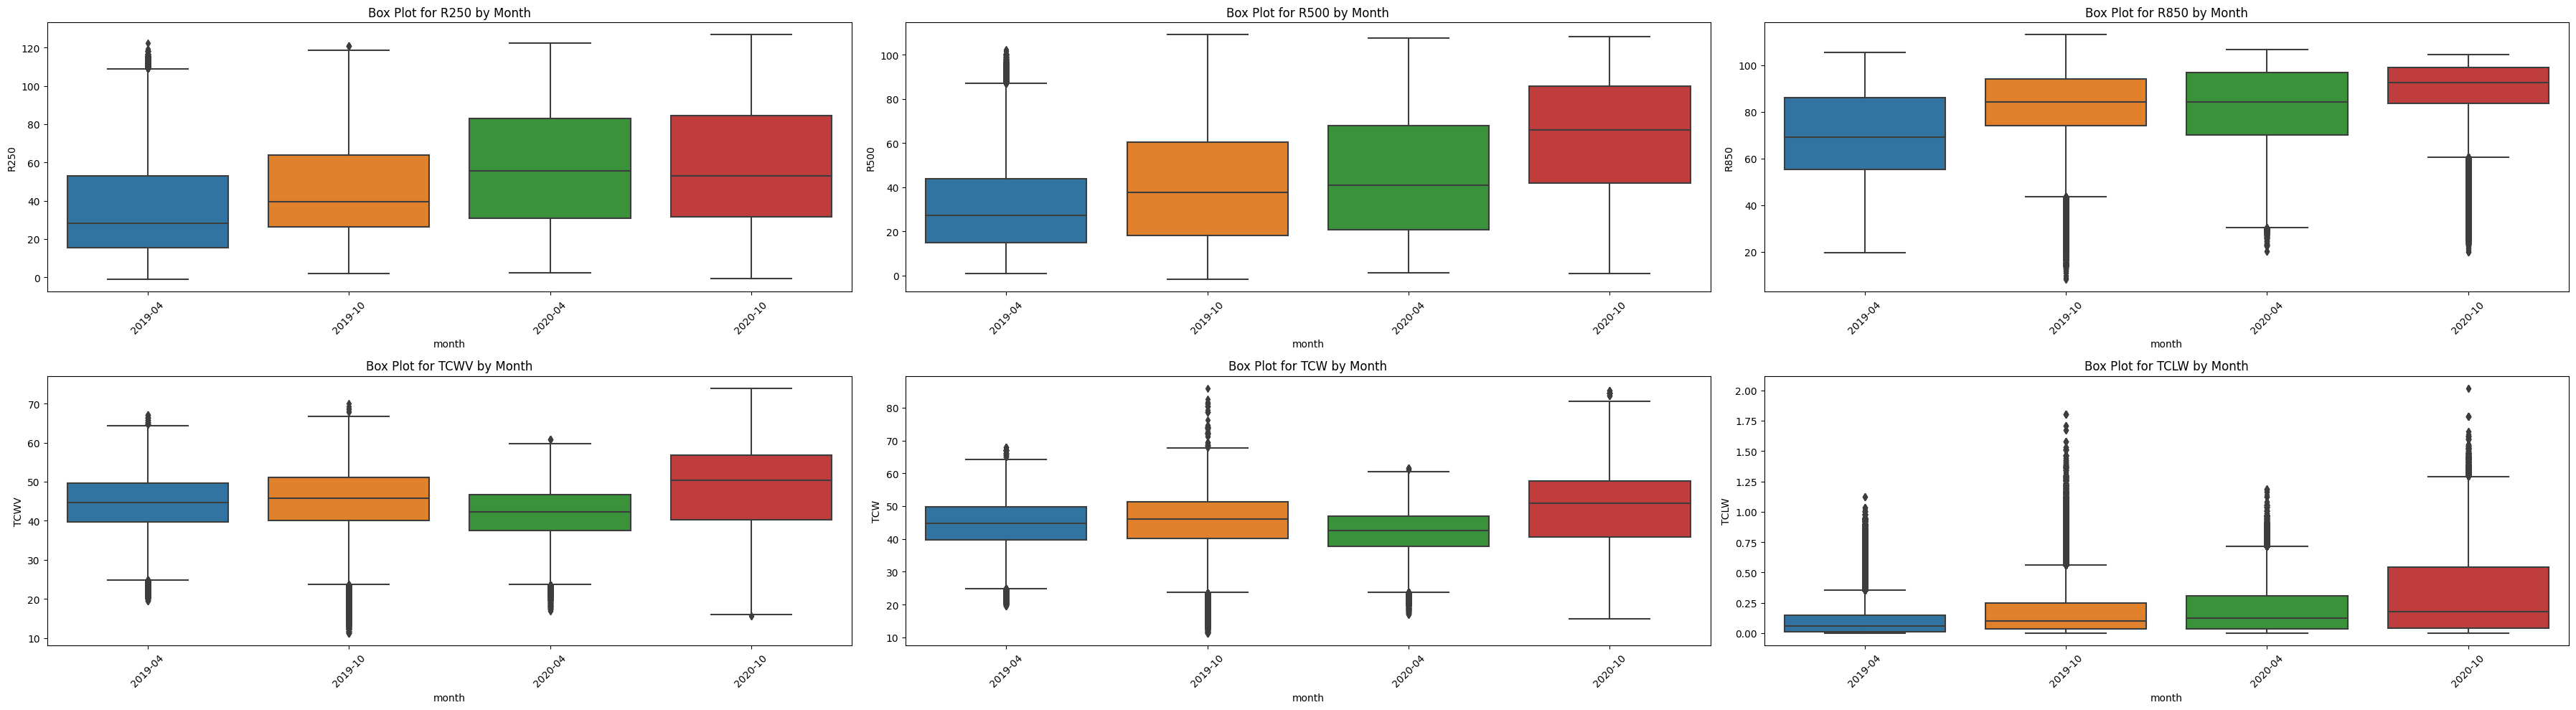

In [48]:
plot_boxplots_by_month(montly_dfs, humidity_variables, subplots=3)

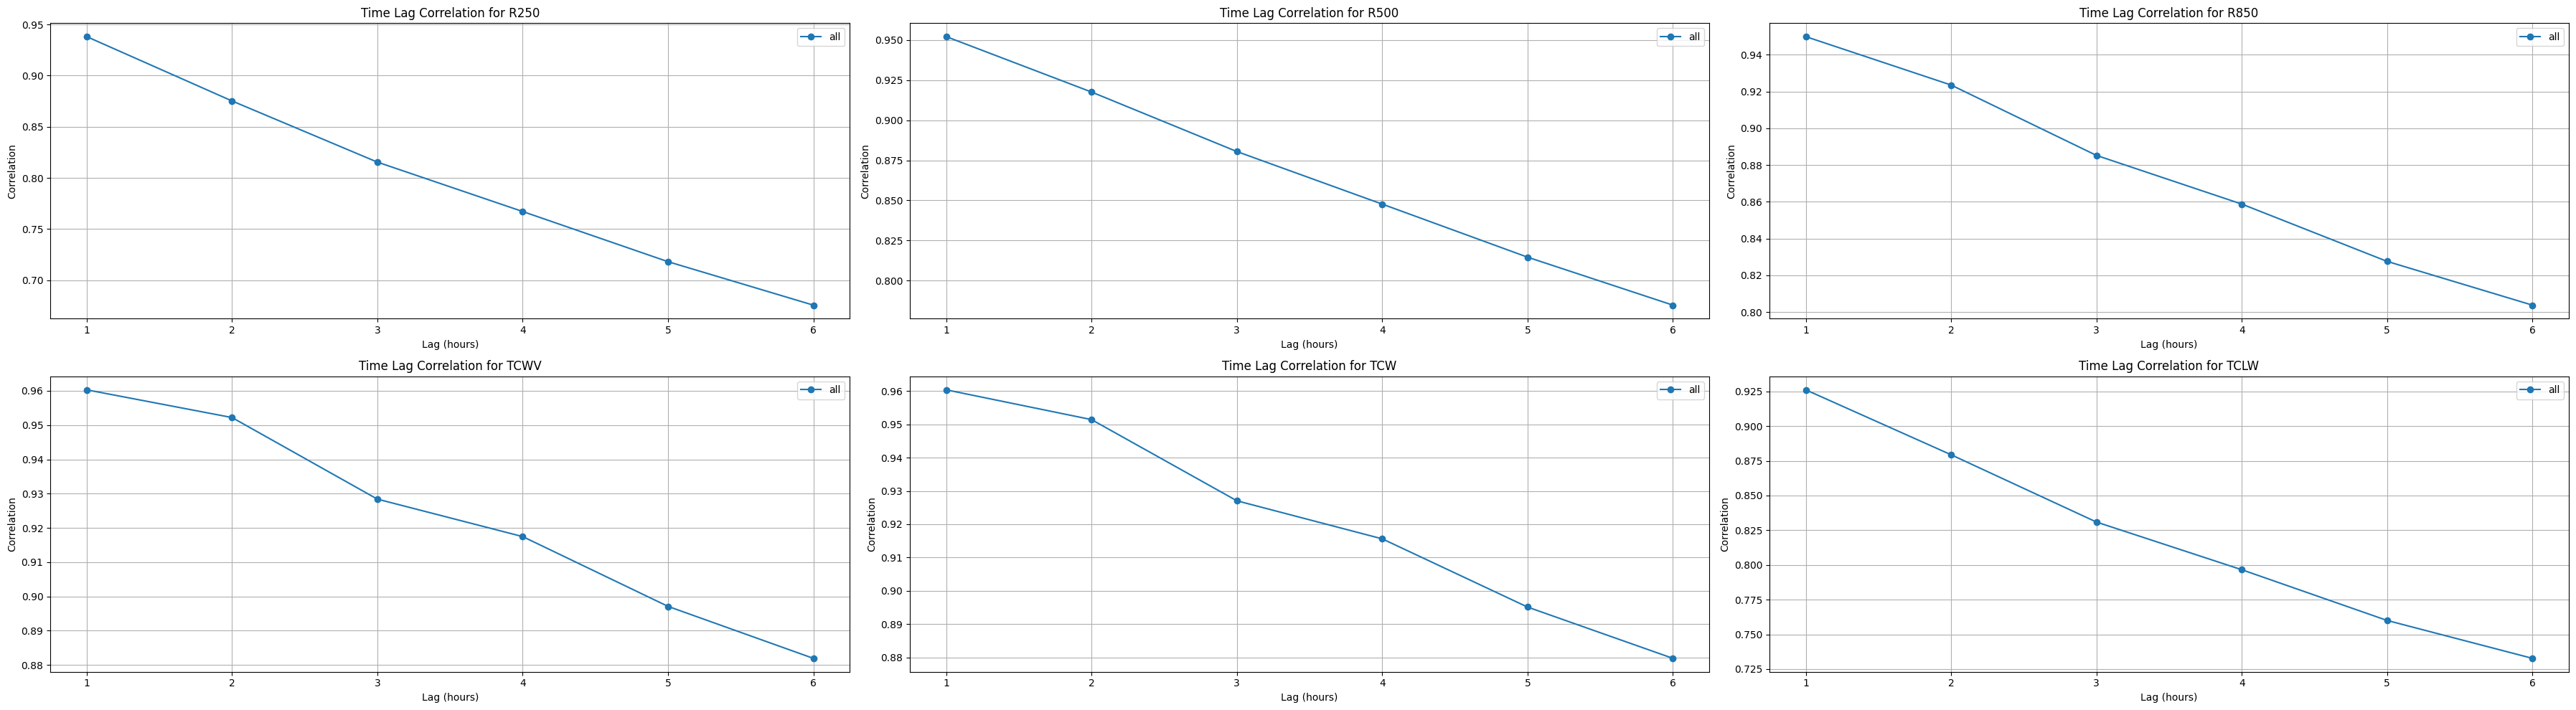

In [49]:
plot_time_lag_correlation(all_dfs, humidity_variables, lags=[1, 2, 3, 4, 5, 6], subplots=3)

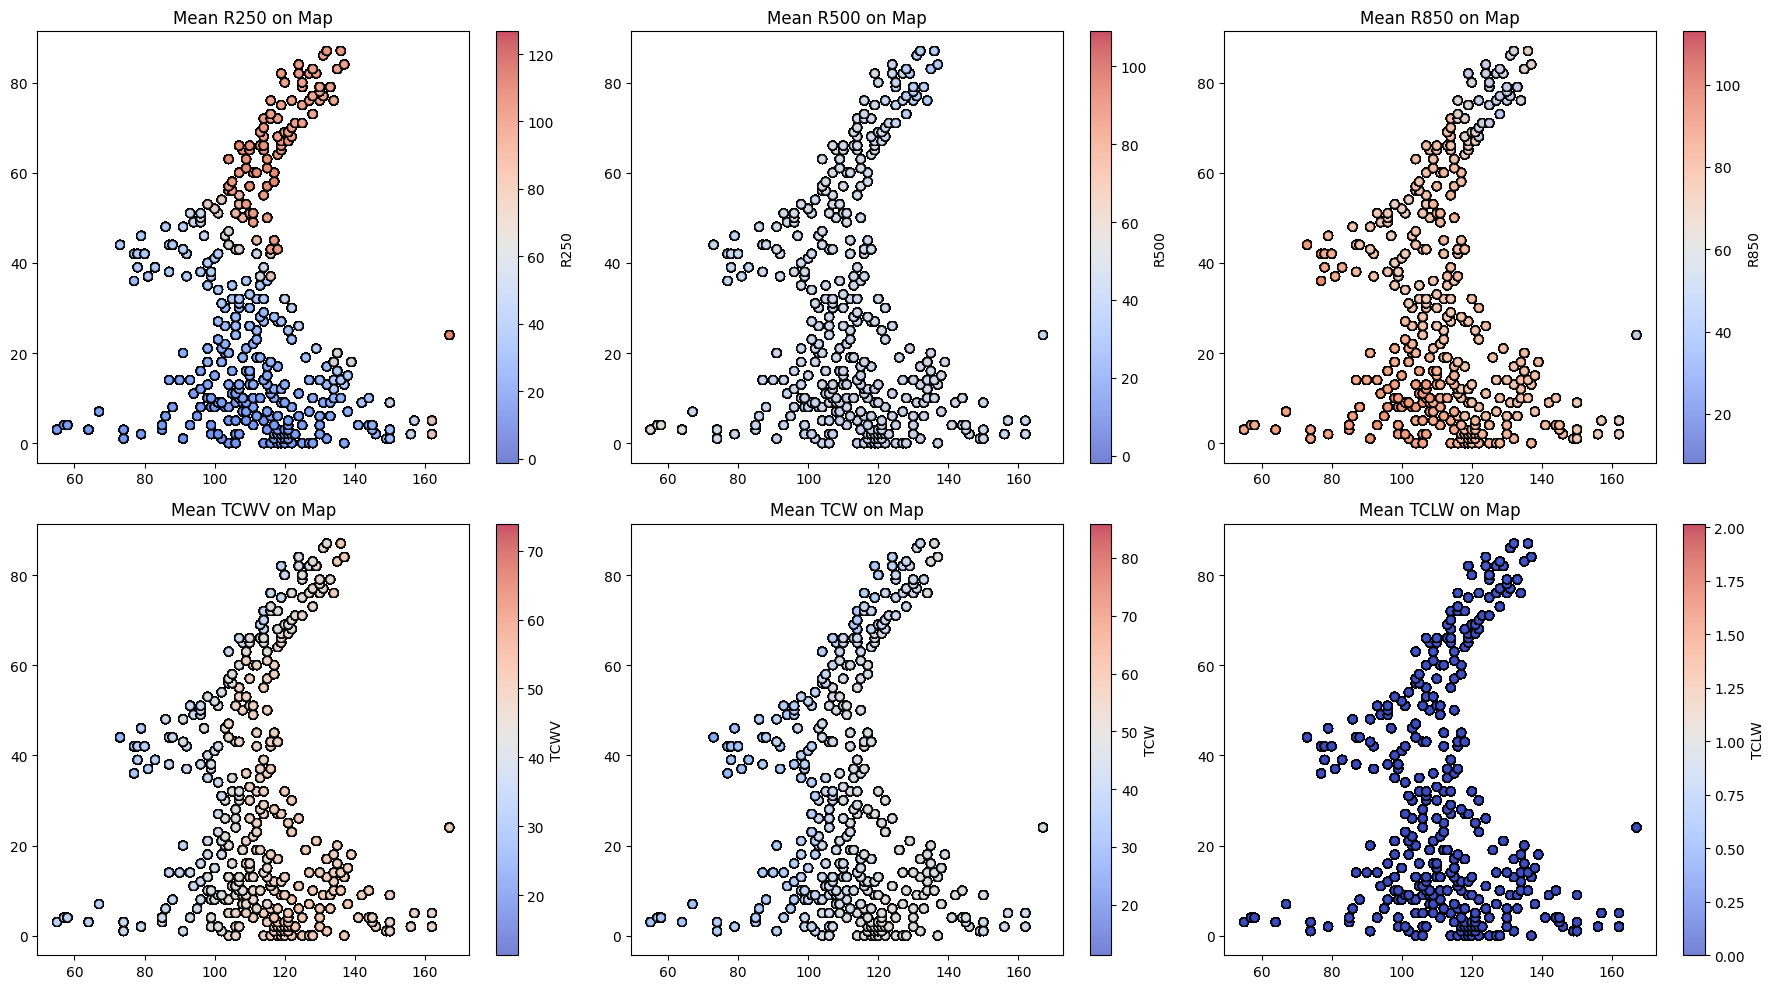

In [50]:
plot_mean_values_on_map(all_dfs, humidity_variables, lat_col='row', lon_col='col', subplots=3)

### **Gió và vận chuyển ẩm**

In [51]:
df_all.get(wind_variables).describe()

U250           U850           V250           V850  \
count  977952.000000  977952.000000  977952.000000  977952.000000   
mean       11.704324      -1.505918       3.110083       0.330804   
std        15.253864       6.022192       8.041525       5.172333   
min       -29.750153     -33.200912     -24.090134     -26.310913   
25%        -1.520294      -5.438904      -2.549026      -2.010166   
50%         9.180359      -1.523499       2.656738       1.495148   
75%        25.269379       3.071487       8.327148       3.674652   
max        50.859619      16.723068      31.436935      16.650955   

                EWSS  
count  977952.000000  
mean     -184.361380  
std       648.684266  
min    -14114.933594  
25%      -380.765625  
50%      -110.683594  
75%        38.835938  
max      7265.097656

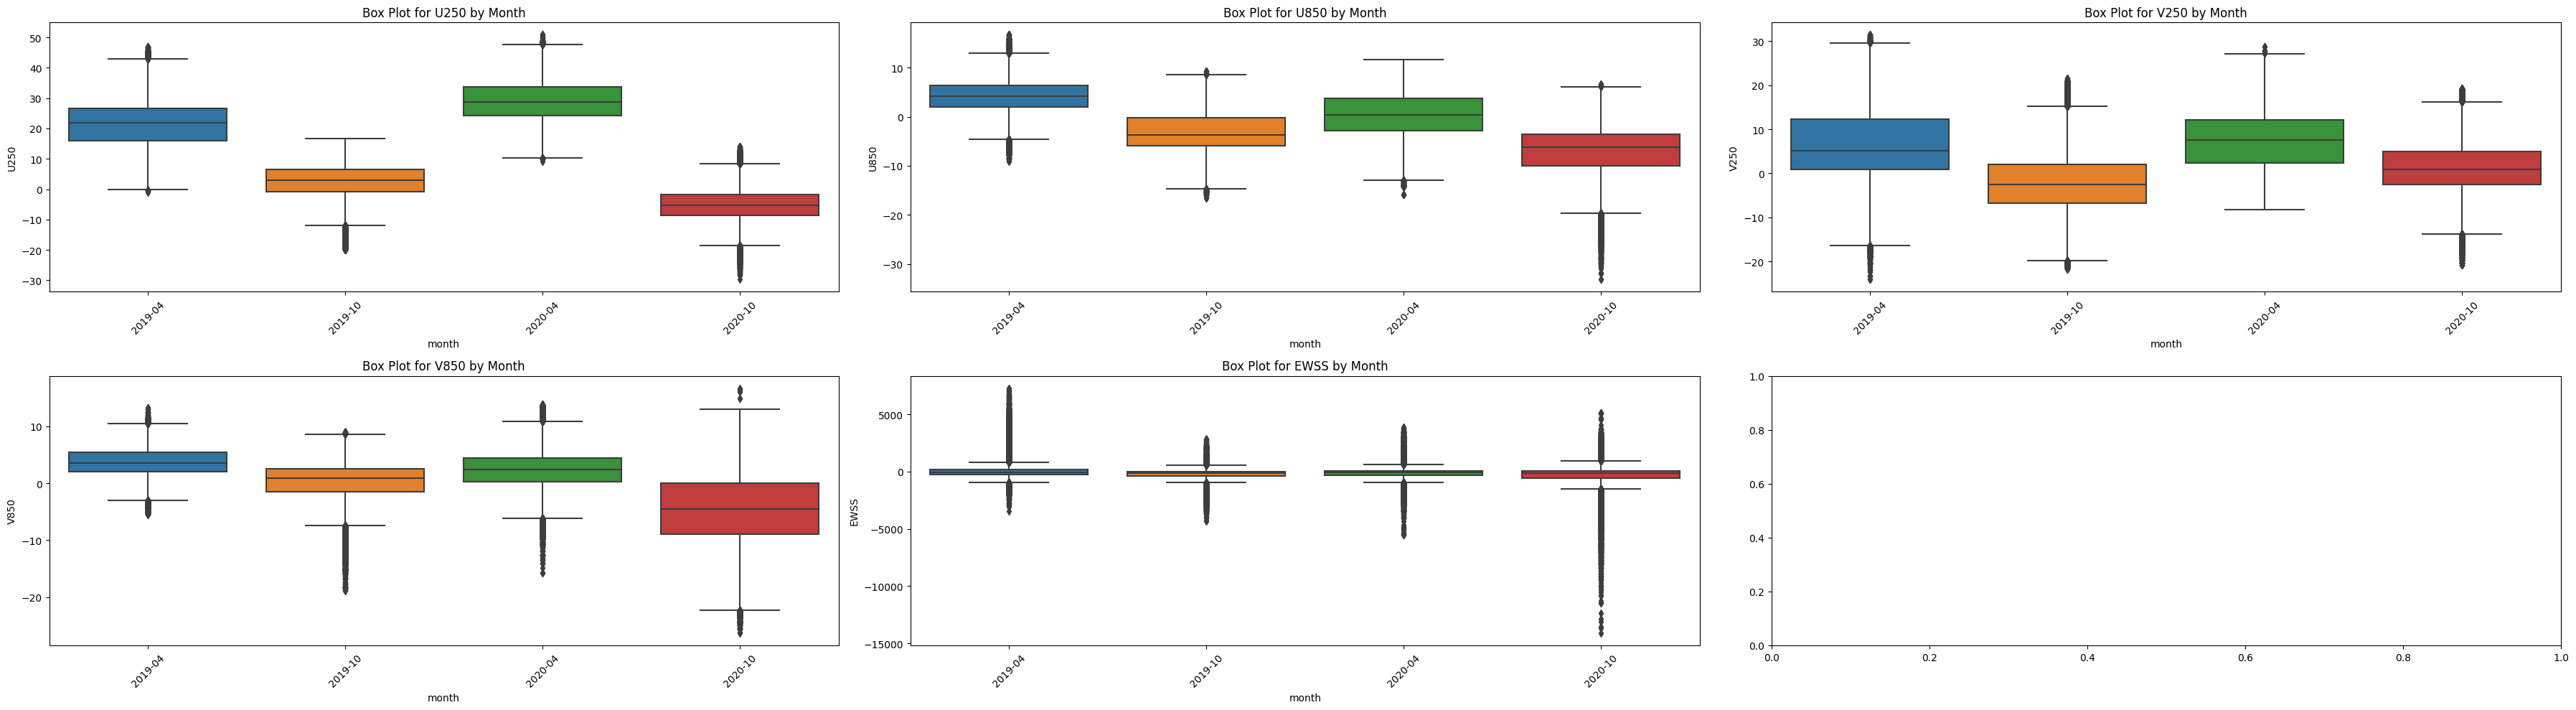

In [52]:
plot_boxplots_by_month(montly_dfs, wind_variables, subplots=3)

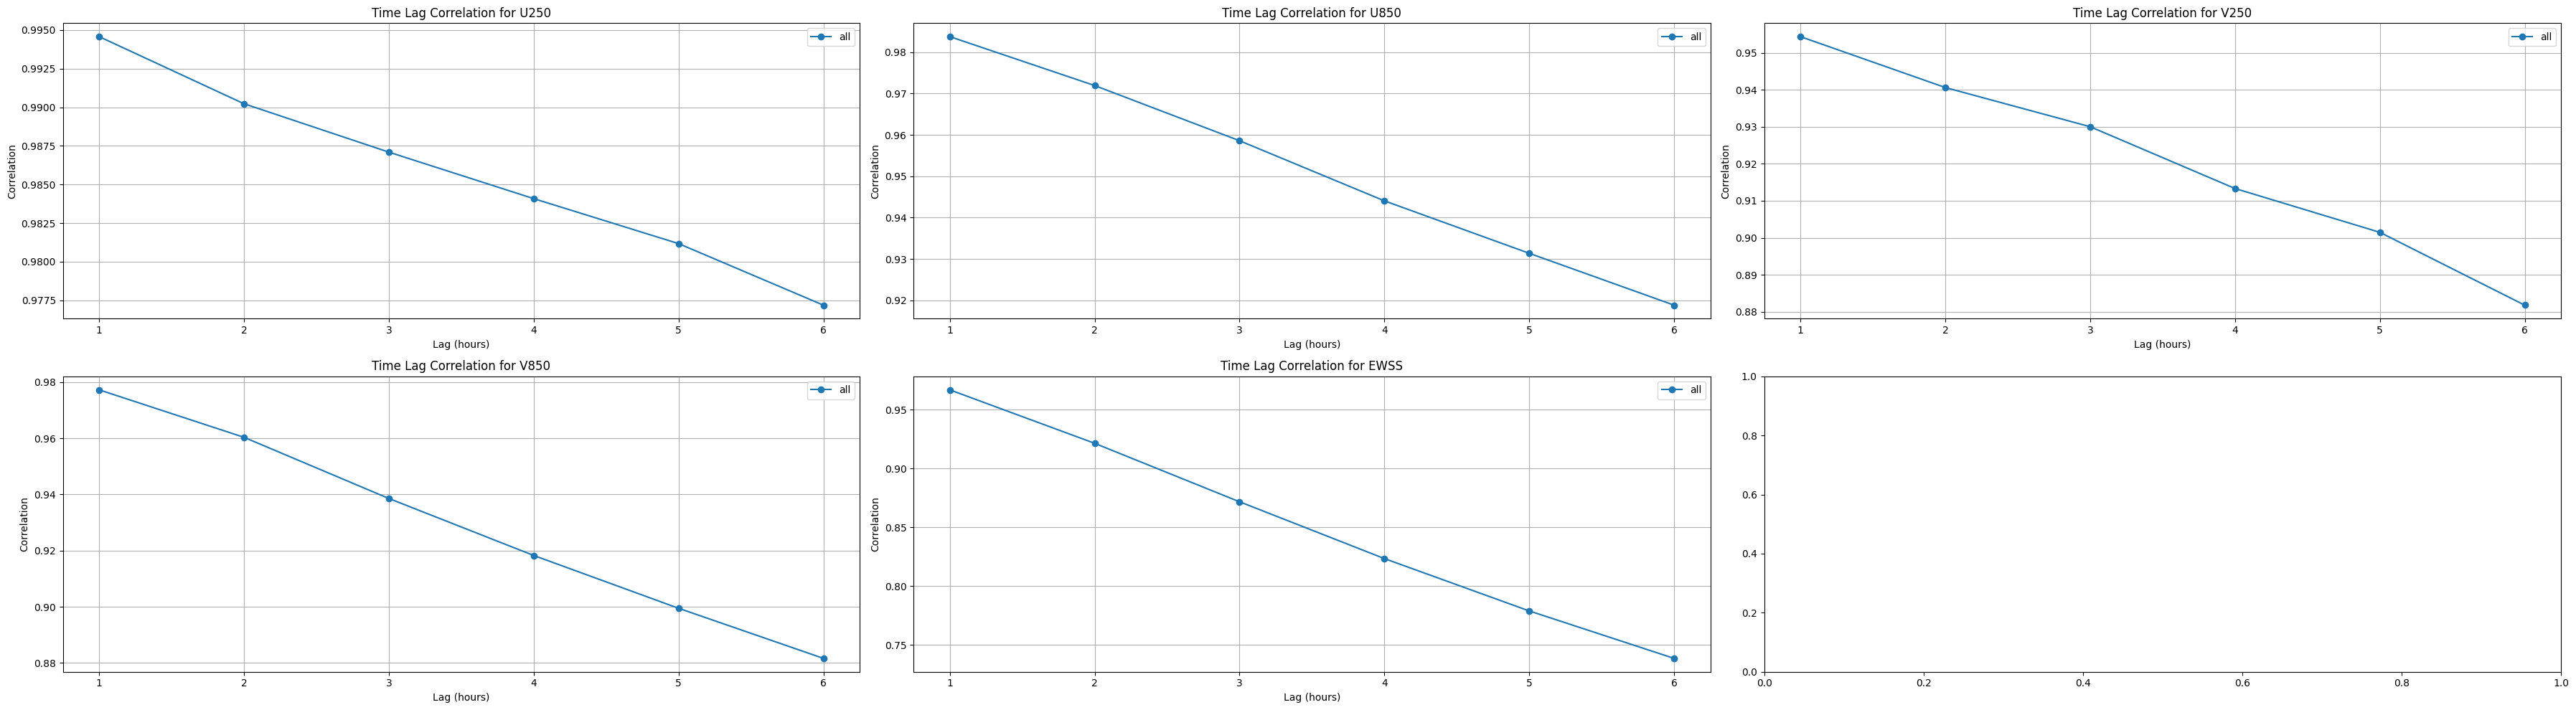

In [53]:
plot_time_lag_correlation(all_dfs, wind_variables, lags=[1, 2, 3, 4, 5, 6], subplots=3)

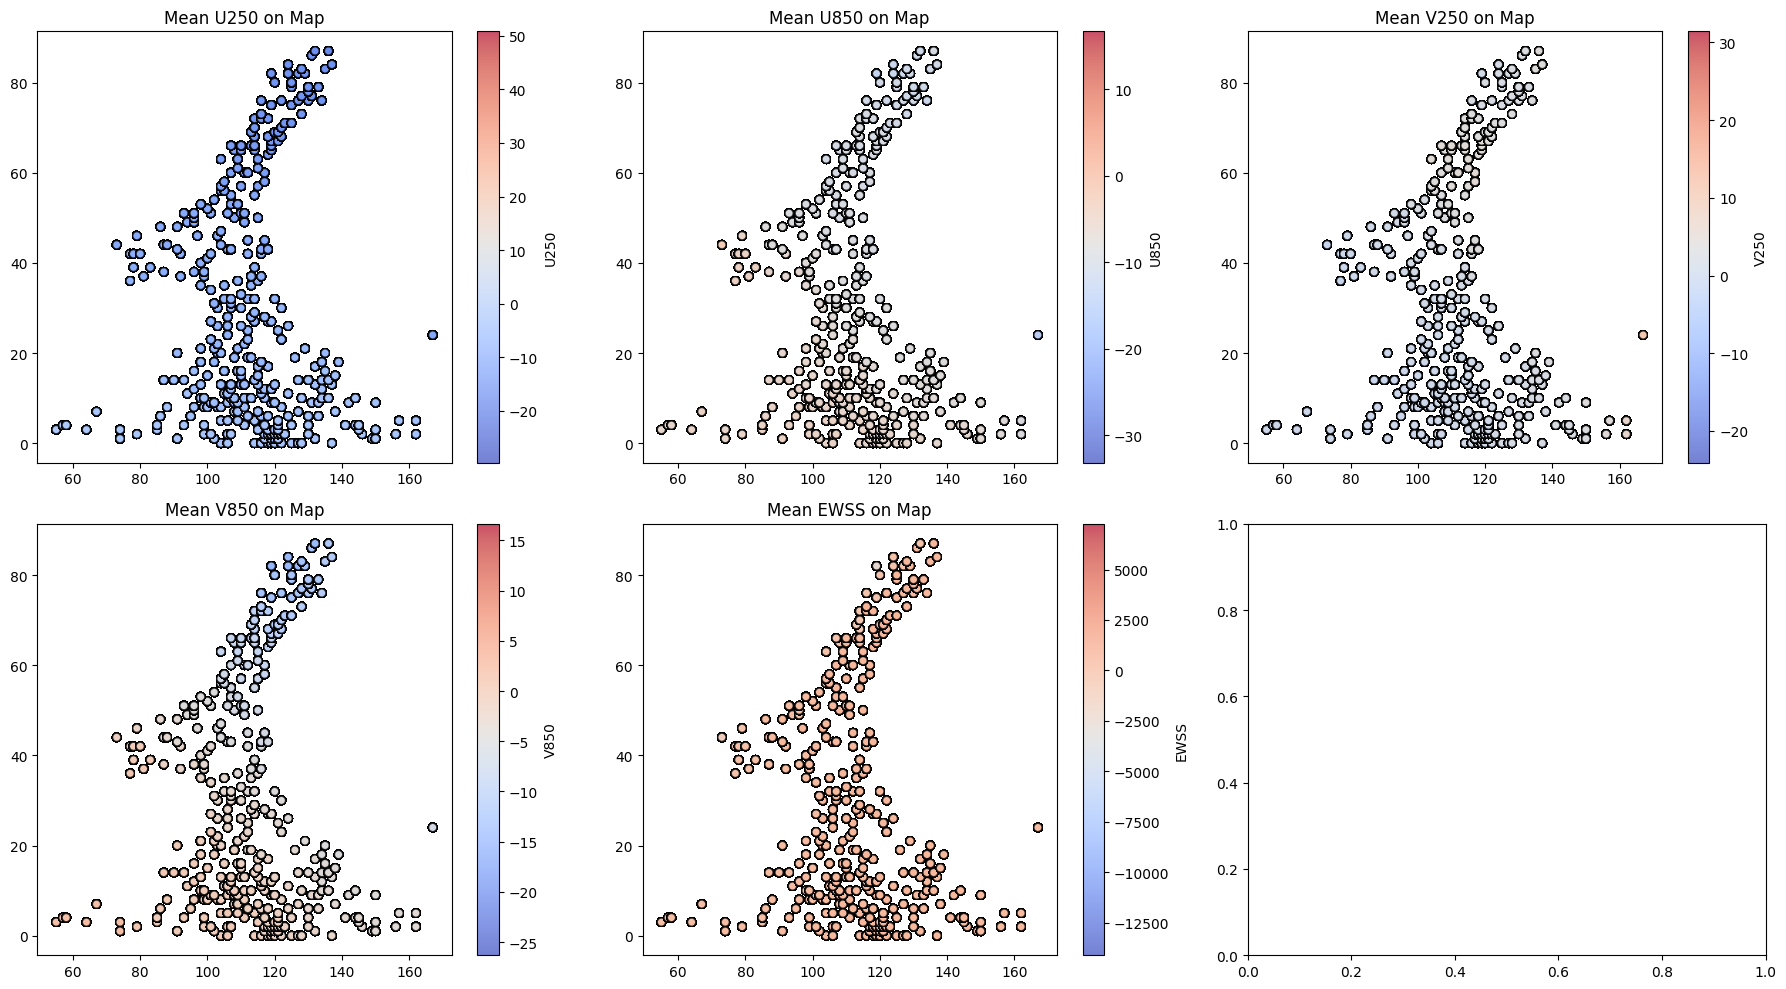

In [54]:
plot_mean_values_on_map(all_dfs, wind_variables, lat_col='row', lon_col='col', subplots=3) 

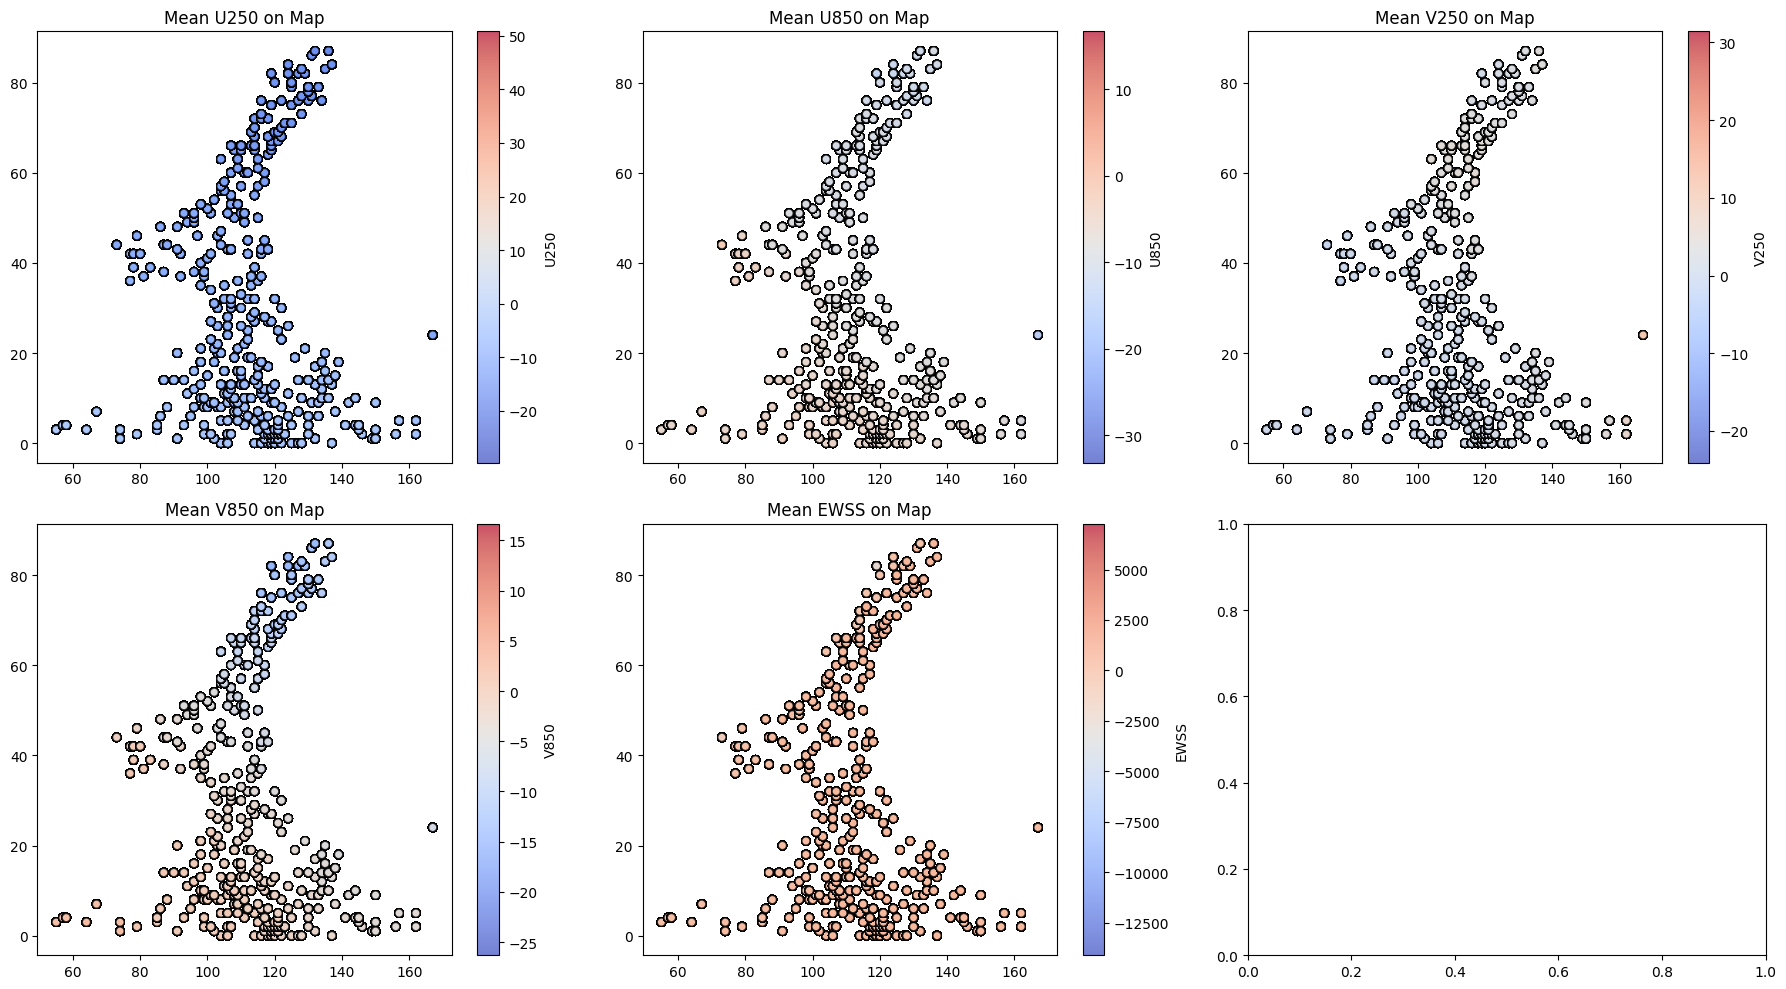

In [55]:
plot_mean_values_on_map(all_dfs, wind_variables, lat_col='row', lon_col='col', subplots=3)

### **Năng lượng đối lưu và mất ổn định**

In [56]:
df_all.get(convective_energy_variables).describe()

CAPE           CIN             KX
count  977952.000000  9.779520e+05  977952.000000
mean      745.907913  5.187969e+03      28.989299
std      1120.292074  4.875942e+03       8.066065
min         0.000000  8.769808e-08     -31.761223
25%         3.750000  1.806563e+02      26.583069
50%       157.125000  9.999000e+03      30.825184
75%      1093.000000  9.999000e+03      34.066254
max      8722.750000  9.999000e+03      45.255096

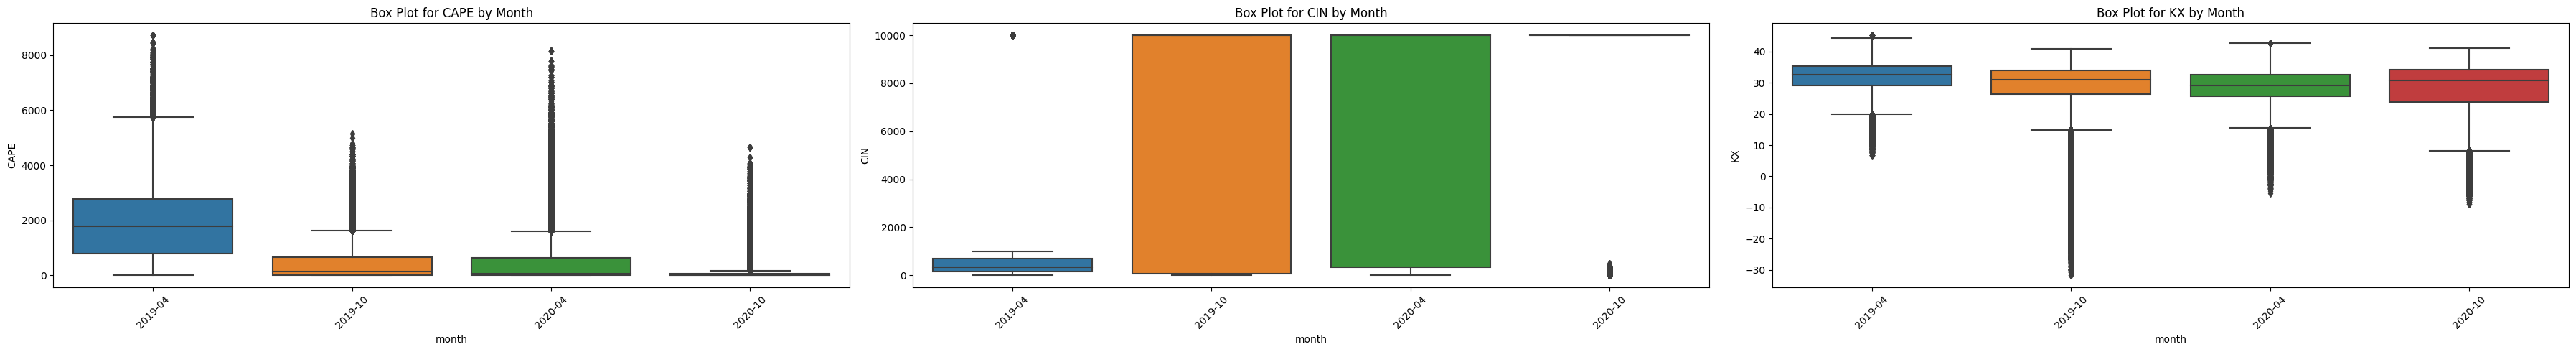

In [57]:
plot_boxplots_by_month(montly_dfs, convective_energy_variables, subplots=3)

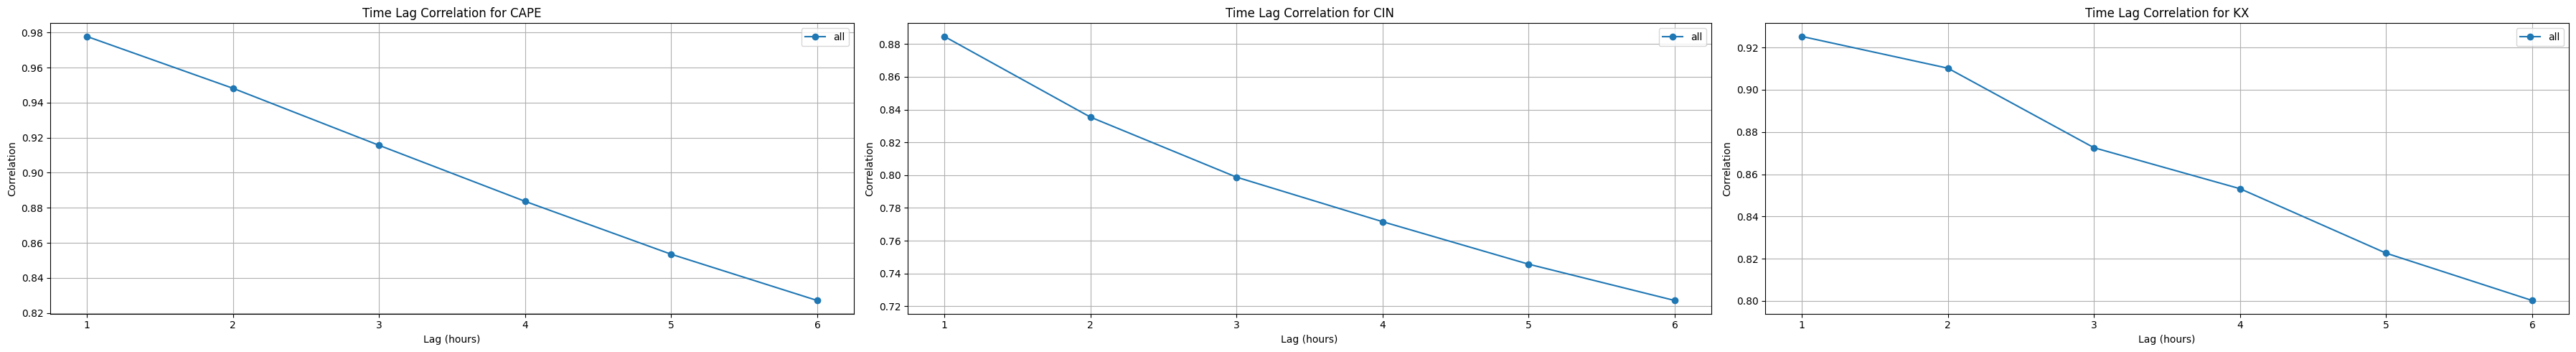

In [58]:
plot_time_lag_correlation(all_dfs, convective_energy_variables, lags=[1, 2, 3, 4, 5, 6], subplots=3)

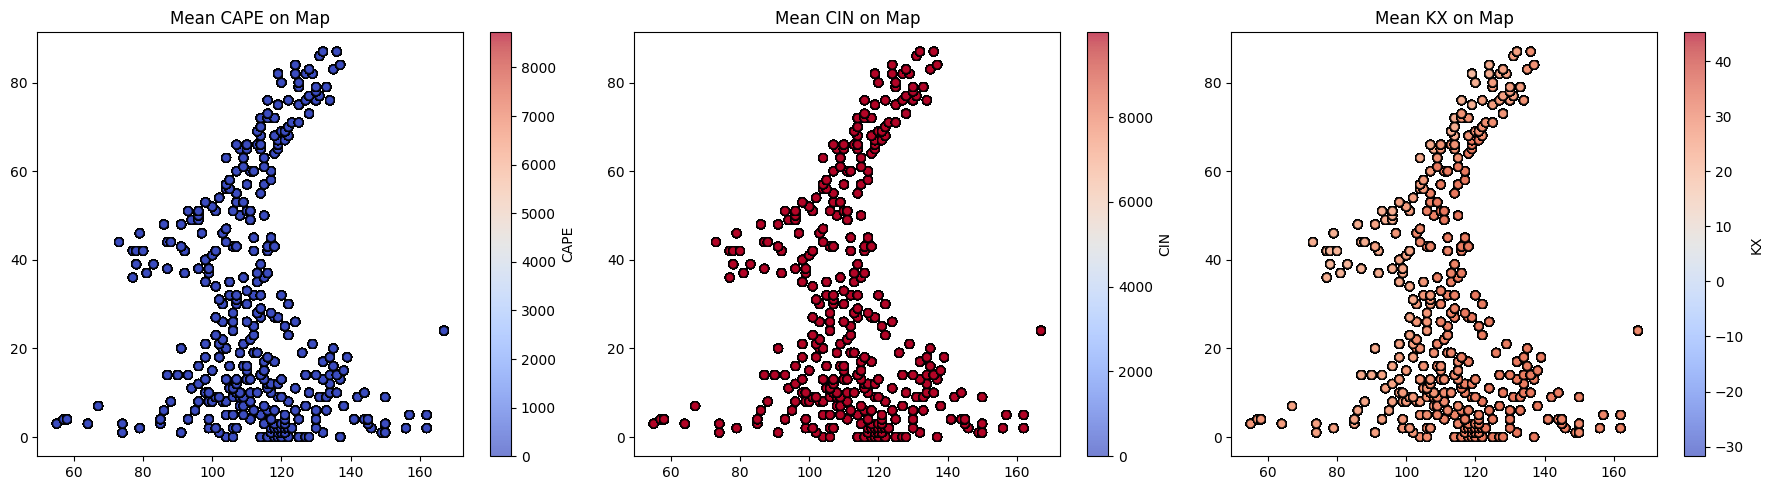

In [59]:
plot_mean_values_on_map(all_dfs, convective_energy_variables, lat_col='row', lon_col='col', subplots=3)

## **Trao đổi nhiệt ẩm bề mặt**

In [60]:
df_all.get(surface_exchange_variables).describe()

SLHF          SSHF             IE            PEV
count  9.779520e+05  9.779520e+05  977952.000000  977952.000000
mean  -3.456797e+05 -5.302307e+04      -0.000039      -0.000134
std    4.284179e+05  1.604742e+05       0.000048       0.000211
min   -2.241972e+06 -1.622733e+06      -0.000315      -0.001346
25%   -5.447350e+05 -8.080600e+04      -0.000062      -0.000187
50%   -1.421880e+05  1.328000e+03      -0.000015      -0.000019
75%   -2.700200e+04  2.363600e+04      -0.000003      -0.000004
max    9.982100e+04  5.304740e+05       0.000012       0.000027

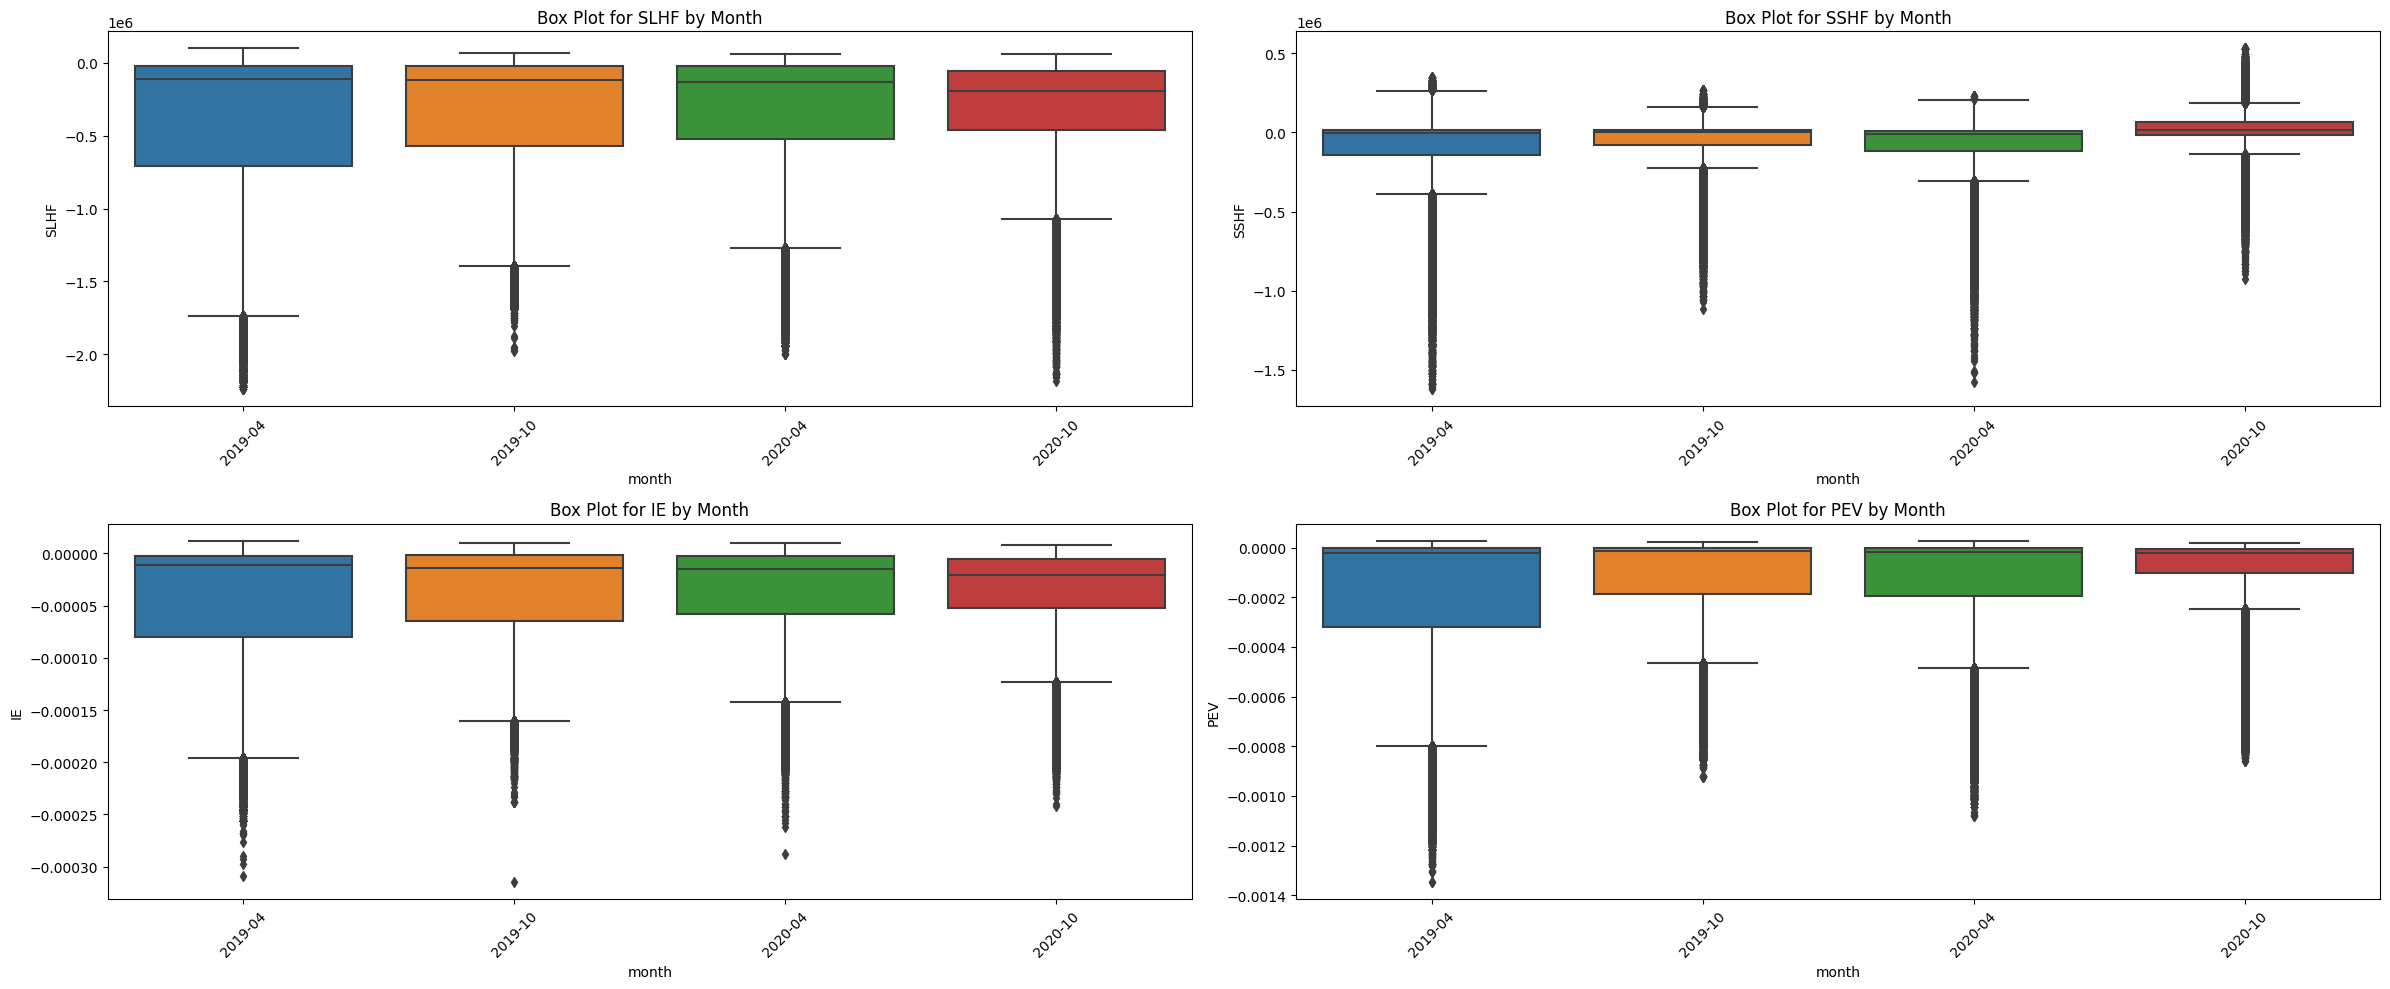

In [61]:
plot_boxplots_by_month(montly_dfs, surface_exchange_variables, subplots=2)

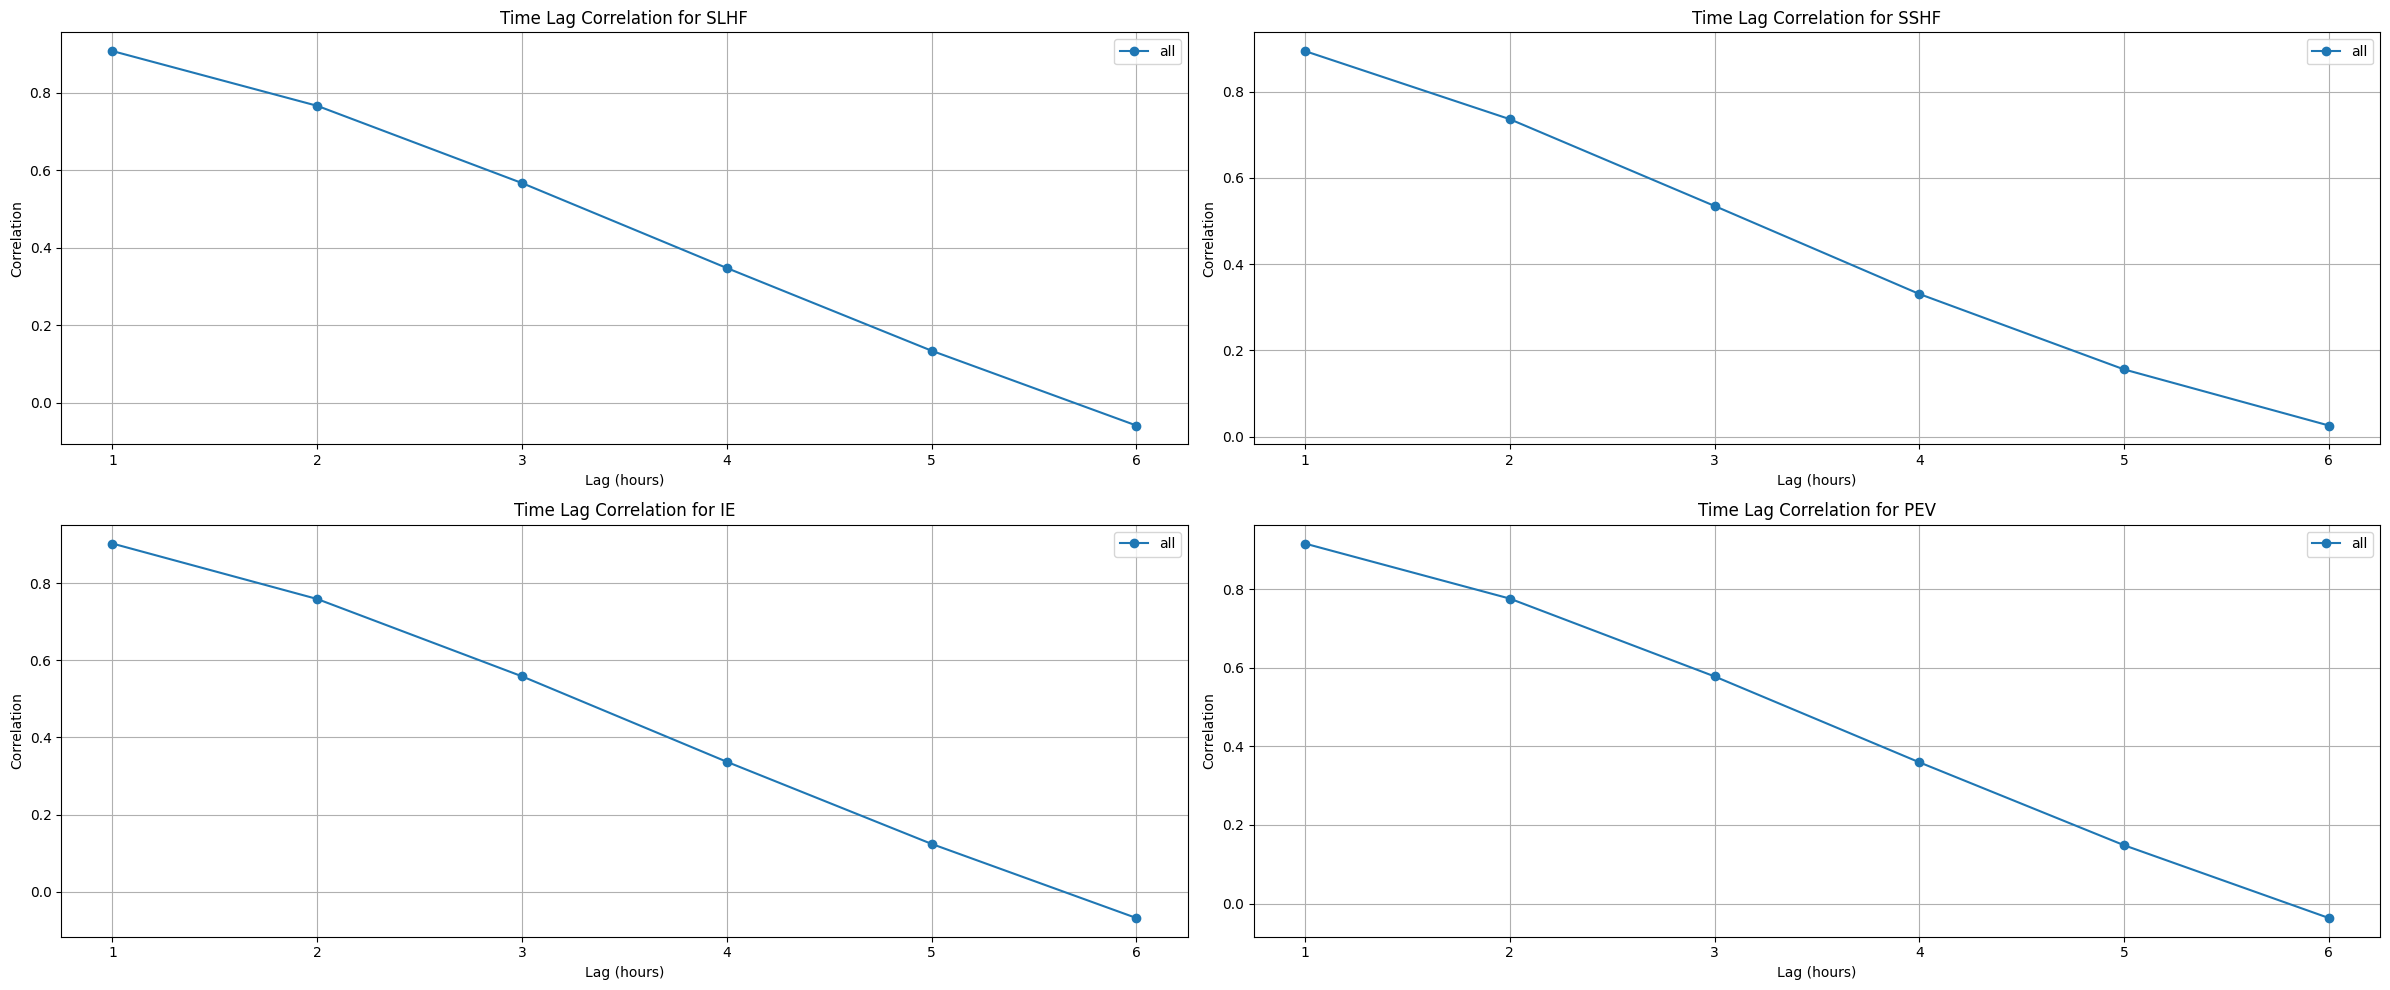

In [62]:
plot_time_lag_correlation(all_dfs, surface_exchange_variables, lags=[1, 2, 3, 4, 5, 6], subplots=2)

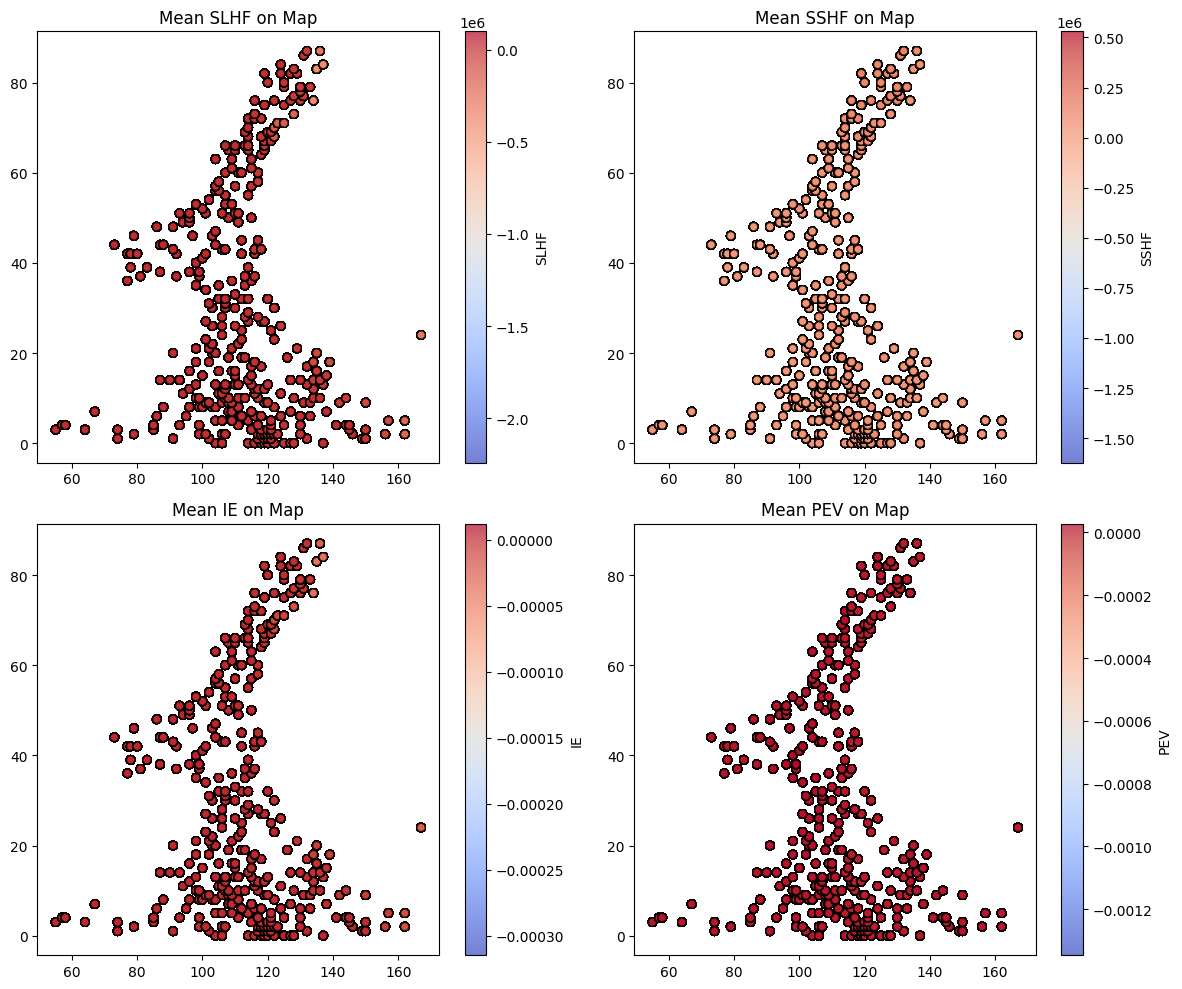

In [63]:
plot_mean_values_on_map(all_dfs, surface_exchange_variables, lat_col='row', lon_col='col', subplots=2)

### **Địa hình**

In [64]:
df_all.get(terrain_variables).describe()

ISOR           SLOR
count  977952.000000  977952.000000
mean        0.463731       0.020417
std         0.180551       0.014138
min         0.000000       0.000100
25%         0.370204       0.008039
50%         0.486200       0.018741
75%         0.596432       0.031878
max         0.867496       0.058033

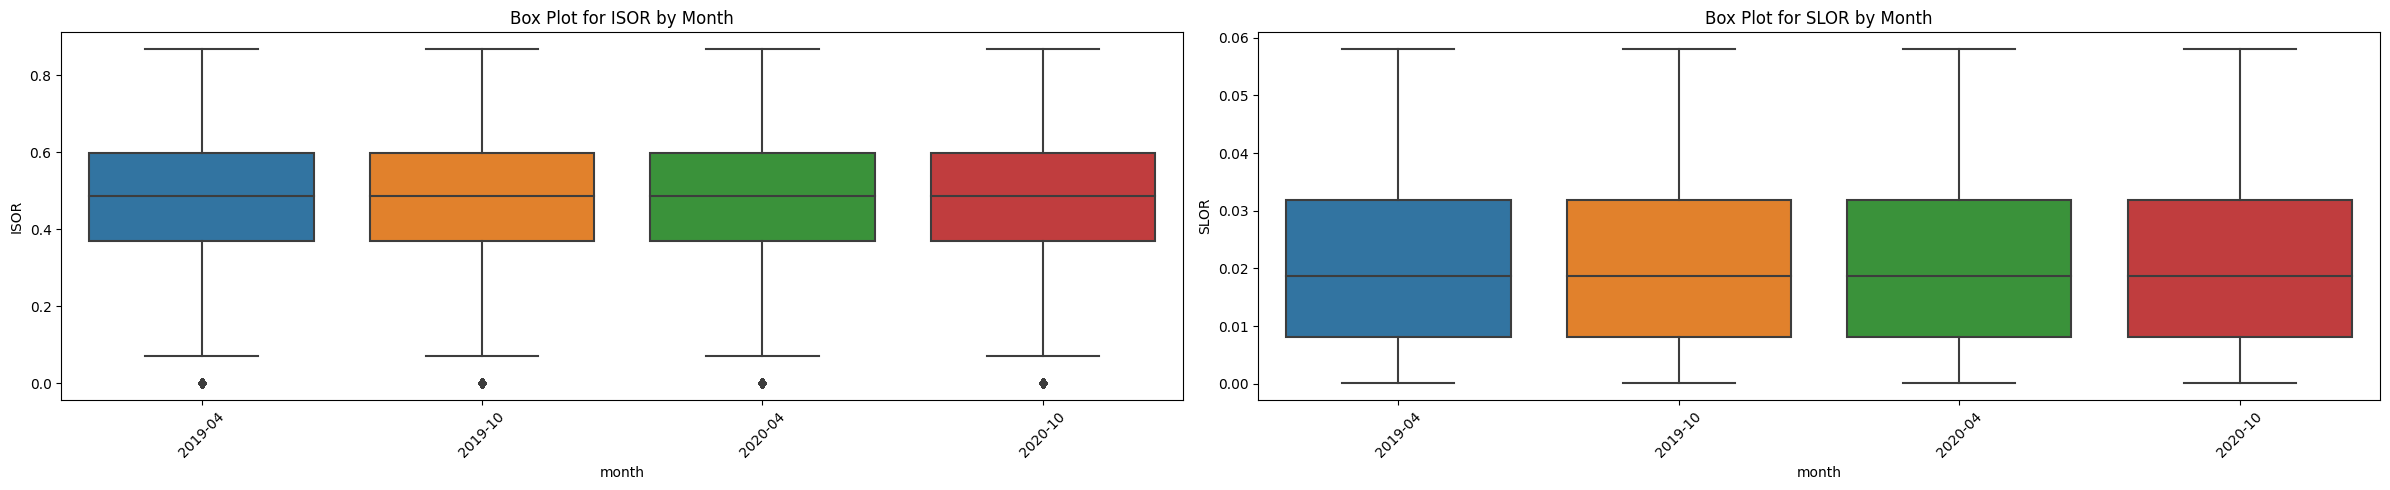

In [65]:
plot_boxplots_by_month(montly_dfs, terrain_variables, subplots=2)   

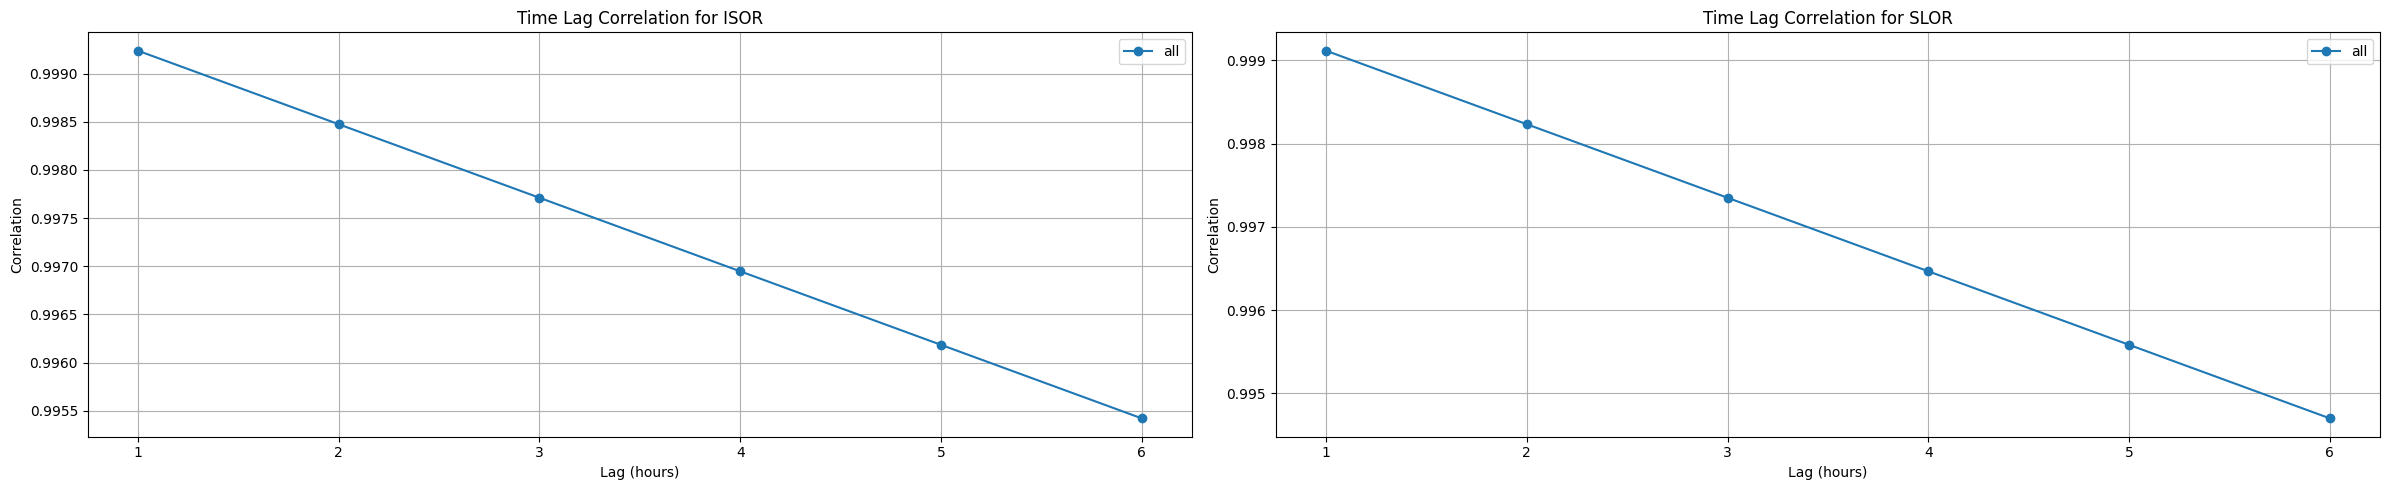

In [66]:
plot_time_lag_correlation(all_dfs, terrain_variables, lags=[1, 2, 3, 4, 5, 6], subplots=2)  

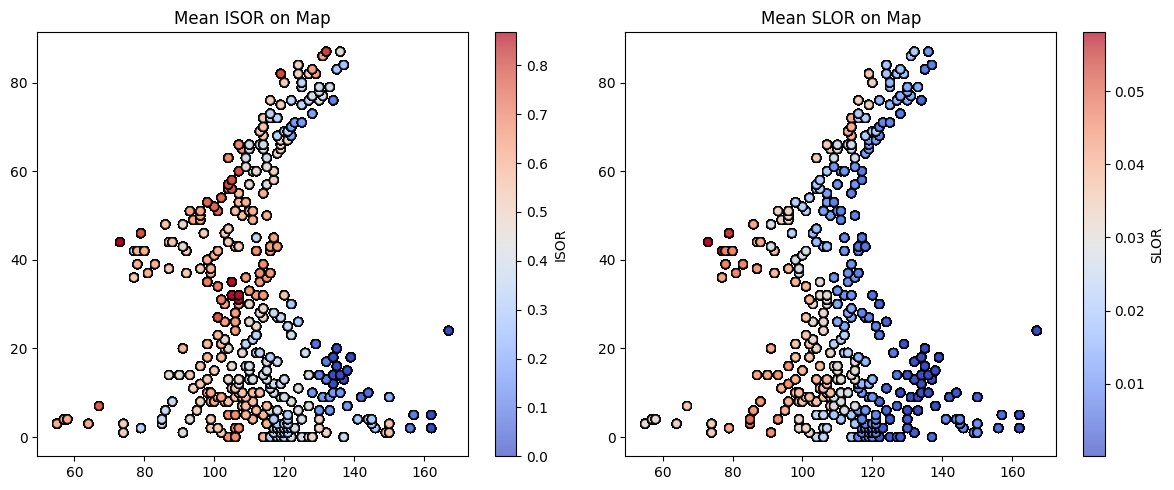

In [67]:
plot_mean_values_on_map(all_dfs, terrain_variables, lat_col='row', lon_col='col', subplots=2)

### **Nhận xét chung**
Về mức độ tương quan về thời gian, ở đa số ở các biến quan trọng trong dự đoán lượng mưa (phân tích ở trên), timestep = 6h vẫn có thể giữ độ tương quan >= 0.8

=> có thể thử từ timestep 3-6h

## **Kiểm tra mưa cực đoan và tương quan**

In [68]:
max(df_all['AWS'])

121.5999984741211

In [69]:
import pandas as pd

large_rain = df_all[df_all['AWS'] >= 80]

large_rain.head()

/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater_equal
  return op(a, b)


datetime  row  col         AWS      CAPE          CIN  \
181252  2019-04-23 04:00:00   50  115   85.900002  2697.625  9999.000000   
181277  2019-04-24 05:00:00   50  115  121.599998  1886.500   871.859375   
181331  2019-04-26 11:00:00   50  115   94.300003  3220.500   300.906433   
181340  2019-04-26 20:00:00   50  115  110.599998  3267.750   209.578262   
181342  2019-04-26 22:00:00   50  115   92.599998  2529.875   314.031342   

              EWSS            IE      ISOR         KX  ...       SLHF    SLOR  \
181252 -153.496094 -1.713969e-04  0.599308  25.059914  ... -1280464.0  0.0073   
181277   73.605469 -1.876720e-04  0.599308  27.403496  ... -1642399.0  0.0073   
181331 -873.718750 -5.839858e-06  0.599308  39.257179  ...  -157772.0  0.0073   
181340  -24.785156 -5.129259e-07  0.599308  39.453255  ...    -8240.0  0.0073   
181342   -9.914062 -3.927853e-07  0.599308  39.237831  ...    -3632.0  0.0073   

            SSHF      TCLW        TCW       TCWV       U250      U850  \
181252 -489484.0  0.000061  49.644577  49.642609  16.713272  4.676773   
181277 -542266.0  0.000122  39.111725  39.111725  19.969894  6.511124   
181331  -54710.0  0.031006  57.882339  57.378189  25.092834  1.860764   
181340    5066.0  0.025391  57.109192  57.050568  22.297531  3.750854   
181342    2619.0  0.014587  53.652832  53.623520  18.835907  4.970779   

            V250      V850  
181252  6.190933 -0.162979  
181277  1.680893  2.411331  
181331  4.848267  2.677612  
181340  7.099564  4.179016  
181342  7.270218  5.231995  

[5 rows x 24 columns]

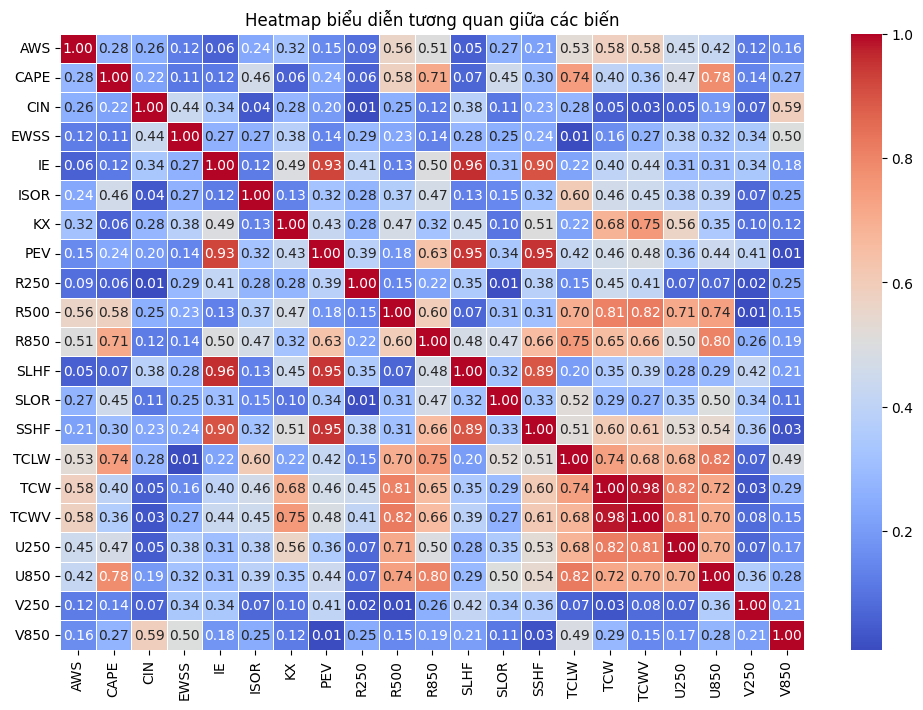

In [72]:
# Tính ma trận tương quan
corr_matrix = large_rain.drop(columns=['datetime', 'row', 'col']).corr().abs()

# Vẽ heatmap để trực quan hóa ma trận tương quan
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Heatmap biểu diễn tương quan giữa các biến")
plt.show()

**Nhận xét:** Lượng mưa cao đột biến phần lớn do các biến liên quan đến lượng nước và độ ẩm (R500, R850, TCLW, TCW, TCWV)